In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('E:\lec data science\machine learning\income.csv')

In [3]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.shape

(22, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [6]:
df.describe()

,Age,Income
count,22.000000,22.000000
mean,34.818182,90704.545455
std,5.901060,43953.075382
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [7]:
df.isnull().sum()

Name      0
Age       0
Income    0
dtype: int64

In [8]:
df.drop('Name',axis=1,inplace=True)

In [9]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


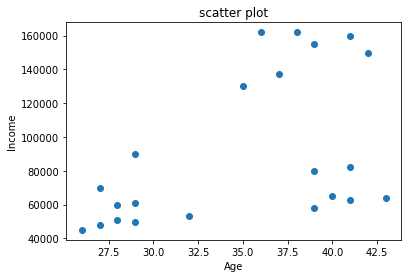

In [10]:
plt.scatter(df['Age'],df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('scatter plot')
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler()

In [13]:
df['Age']=scaler.fit_transform(df[['Age']])

In [14]:
df['Age']

0     0.058824
1     0.176471
2     0.176471
3     0.117647
4     0.941176
5     0.764706
6     0.882353
7     0.705882
8     0.588235
9     0.529412
10    0.647059
11    0.000000
12    0.058824
13    0.117647
14    0.176471
15    0.352941
16    0.823529
17    0.882353
18    1.000000
19    0.764706
20    0.882353
21    0.764706
Name: Age, dtype: float64

In [15]:
df['Income']=scaler.fit_transform(df[['Income']])

In [16]:
from sklearn.cluster import KMeans

In [17]:
model=KMeans(n_clusters=3)

In [18]:
model.fit(df[['Age','Income']])

KMeans(n_clusters=3)

In [19]:
predicted=model.predict(df[["Age","Income"]])

In [20]:
predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [21]:
df['clusters']=predicted

In [22]:
df.head()

,Age,Income,clusters
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [23]:
df0=df[df['clusters']==0]

In [24]:
df0.head()

,Age,Income,clusters
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
11,0.000000,0.000000,0


In [25]:
df1=df[df['clusters']==1]

In [26]:
df1.head()

,Age,Income,clusters
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,1.000000,1


In [27]:
df2=df[df['clusters']==2]

In [28]:
df2.head()

,Age,Income,clusters
16,0.823529,0.170940,2
17,0.882353,0.153846,2
18,1.000000,0.162393,2
19,0.764706,0.299145,2
20,0.882353,0.316239,2


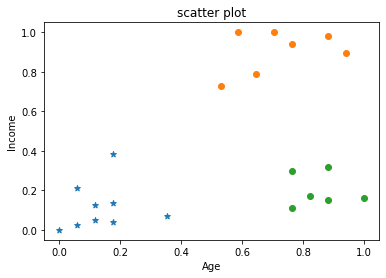

In [29]:
plt.scatter(df0["Age"],df0["Income"],marker='*')
plt.scatter(df1["Age"],df1["Income"])
plt.scatter(df2["Age"],df2["Income"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("scatter plot")
plt.show()

In [30]:
model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.9047619 ],
       [0.85294118, 0.2022792 ]])

In [31]:
model.inertia_

0.48259220352300936

In [32]:
sse=[]
krange=range(1,10)
for k in krange:
    model=KMeans(n_clusters=k)
    model.fit(df[['Age','Income']])
    sse.append(model.inertia_)

D:\New folder\New folder\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
sse

[5.493999956592008,
 2.1317304647961124,
 0.48259220352300936,
 0.36400718588289455,
 0.28130548890777957,
 0.22472555029282476,
 0.16898932270608844,
 0.13294640369286218,
 0.10498404982220386]

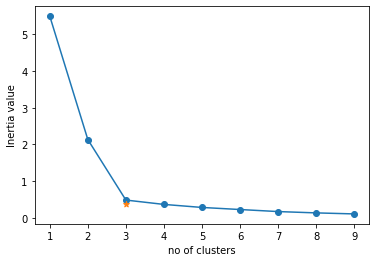

In [34]:
plt.plot(krange,sse)
plt.scatter(krange,sse)
plt.scatter(3,sse[3],marker='*')
plt.xlabel('no of clusters',size=10)
plt.ylabel('Inertia value',size=10)
plt.show()